In [15]:
import matplotlib.pyplot as plt
from matplotlib import markers
from matplotlib.patches import Ellipse
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import pandas as pd
import numpy as np
from pciSeq.src.cell_call.utils import gaussian_ellipsoid

In [71]:
ellipses = [
    [[4518.0, 410.33333333], 0.36918033, 4.30204733, 3.62963882],
    [[4517.98584839,  407.33241277], 0.35097111, 4.99828228, 4.45116536],
    [[4516.93219699,  401.12420732], 0.25840461, 7.88794531, 5.68572671],
    [[4512.35232117,  397.34068771], 0.39340821, 12.00153399,  6.70631917],
    [[4507.51864527,  394.90700783], 0.54076384, 14.50118457,  8.73326108],
    [[4506.41045715,  394.32825527], 0.60634891, 15.59310476, 10.33710048],
    [[4506.67893651,  394.73057597], 0.63579944, 16.20469547, 11.28839743],
    [[4506.85507381,  394.91154227], 0.64588598, 16.53841512, 11.62942702],
    [[4506.96540904,  394.98508068], 0.64939499, 16.70714372, 11.73930195],
    [[4507.03578845,  395.02105745], 0.65096716, 16.79775297, 11.77986256],
    [[4507.07983777,  395.04072464], 0.65181947, 16.84947518, 11.79759051],
    [[4507.10722258,  395.0521887 ], 0.65232542, 16.88017177, 11.80654994],
    [[4507.12422757,  395.05909811], 0.65263652, 16.89881248, 11.81154604],
    [[4507.13479066,  395.06332969], 0.65283012, 16.91028263, 11.81449484],
    [[4507.14135929,  395.06594258], 0.65295103, 16.9173925,  11.81628773]
]


[[[4518.0, 410.33333333], 0.36918033, 4.30204733, 3.62963882],
 [[4517.98584839, 407.33241277], 0.35097111, 4.99828228, 4.45116536],
 [[4516.93219699, 401.12420732], 0.25840461, 7.88794531, 5.68572671],
 [[4512.35232117, 397.34068771], 0.39340821, 12.00153399, 6.70631917],
 [[4507.51864527, 394.90700783], 0.54076384, 14.50118457, 8.73326108],
 [[4506.41045715, 394.32825527], 0.60634891, 15.59310476, 10.33710048],
 [[4506.67893651, 394.73057597], 0.63579944, 16.20469547, 11.28839743],
 [[4506.85507381, 394.91154227], 0.64588598, 16.53841512, 11.62942702],
 [[4506.96540904, 394.98508068], 0.64939499, 16.70714372, 11.73930195],
 [[4507.03578845, 395.02105745], 0.65096716, 16.79775297, 11.77986256],
 [[4507.07983777, 395.04072464], 0.65181947, 16.84947518, 11.79759051],
 [[4507.10722258, 395.0521887], 0.65232542, 16.88017177, 11.80654994],
 [[4507.12422757, 395.05909811], 0.65263652, 16.89881248, 11.81154604],
 [[4507.13479066, 395.06332969], 0.65283012, 16.91028263, 11.81449484],
 [[4507.

In [93]:
glyph_config = {}
glyph_config = {
    "name": ['3110035E14Rik', 'Aldoc', 'Arpp21', 'Bcl11b', 'Cadps2', 'Cck', 'Cdh13', 'Cnr1', 'Cplx2', 'Crhbp', 'Crym', 'Cux2', 'Enc1', 'Fam19a1', 'Gad1', 'Id2', 'Kcnk2', 'Kctd12', 'Kit', 'Lamp5', 'Ndnf', 'Neurod6', 'Npy', 'Nr4a2', 'Nrn1', 'Nrsn1', 'Pcp4', 'Pde1a', 'Prkca', 'Pvalb', 'Reln', 'Rgs4', 'Rorb', 'Satb1', 'Scg2', 'Sema3c', 'Slc6a1', 'Sst', 'Tac1', 'Wfs1', 'Zcchc12'],
    "color": ['#00FF00', '#FFFFFF', '#44B300', '#407F59', '#995C00', '#FF0000', '#407F59', '#FF0000', '#0000FF', '#00B3FF', '#00FF00', '#44B300', '#44B300', '#44B300', '#0000FF', '#FF00E6', '#44B300', '#FF0000', '#FF00E6', '#FF00E6', '#FF00E6', '#44B300', '#00B3FF', '#44B300', '#00FF00', '#96B38F', '#00FF00', '#407F59', '#407F59', '#5C33FF', '#00B3FF', '#407F59', '#00FF00', '#00B3FF', '#96B38F', '#FF0000', '#0000FF', '#00B3FF', '#5C33FF', '#00FF00', '#96B38F'], 
    "glyph": ['^', 'o', 's', 'o', 'o', '.', '^', '*', '.', 'o', '<', '*', 'v', '>', '*', '+', '.', '*', 's', '>', 'D', '+', '.', 'o', '*', '*', '.', '<', 'D', '*', '^', '*', 'o', '>', '>', 's', '*', '*', 'o', 'D', '+']
}
glyph_config = pd.DataFrame(glyph_config).set_index('name')
# df.loc['Aldoc'].color

In [94]:
def get_color(df, gene_name):
    return df.loc[gene_name].color
    
def get_glyph(df, gene_name):
    return df.loc[gene_name].glyph

In [95]:
img_path = r'pciSeq/data/mouse/ca1/background_image/mouse/background_boundaries.tif'
spots_path = './filtered_spots.csv'

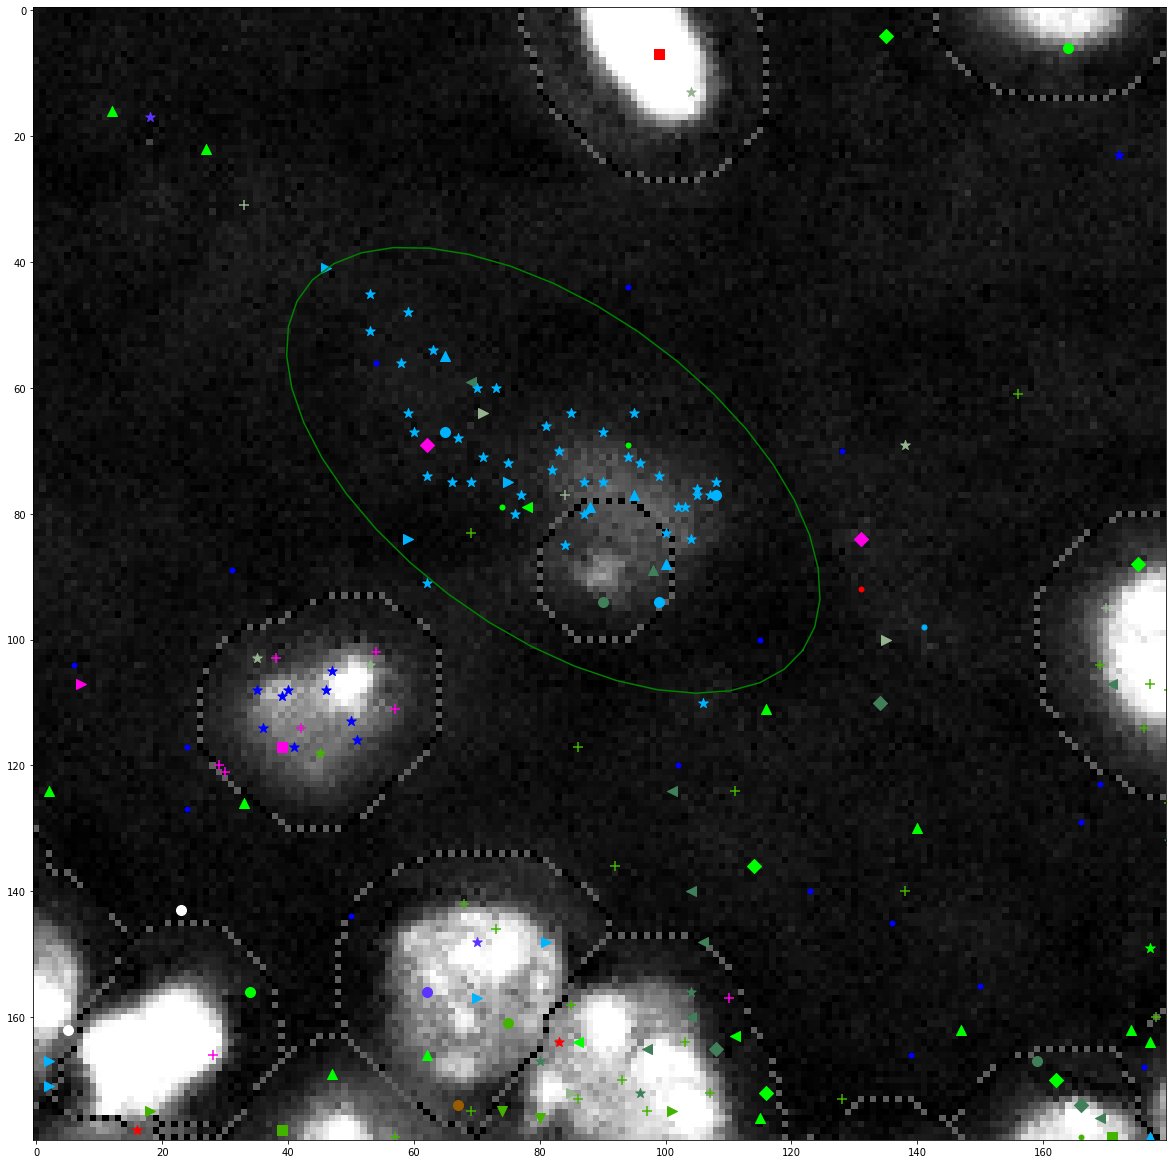

In [96]:
img = plt.imread(img_path)
spots = pd.read_csv(spots_path)

_dpi = 72
fig = plt.figure(1, figsize=(1500/_dpi, 1500/_dpi), dpi=_dpi)
ax = fig.add_subplot(1, 1, 1)

ax.set_aspect('equal')
for index, row in spots.iterrows():
    ax.scatter(row.x-4425, row.y-322, color = get_color(glyph_config, row.Gene) , marker = get_glyph(glyph_config, row.Gene), s=100)

cell_2279 = gaussian_ellipsoid([4507.14545-4425, 395.067-322], 0.65295103, 16.9173925,  11.81628773, 3)
cell_border = list(zip(*cell_2279))
ax.plot(cell_border[0], cell_border[1], c='g')

ax.imshow(img[322:502, 4425:4605], cmap='Greys_r')
plt.show()

In [82]:
plt.show()

In [74]:
for line in ax.lines:
    line.set_marker(None)
    
plt.show()

In [13]:
get_color(glyph_config, 'Sst')

'#00B3FF'

In [6]:
ax.imshow(img[322:502, 4425:4605])

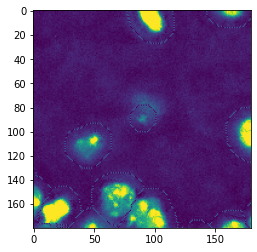

In [36]:
img = plt.imread(img_path)
spots = pd.read_csv(spots_path)

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

# ax.imshow(img)
ax.imshow(img[322:502, 4425:4605])
plt.show()

In [7]:
fig.axes

[]

In [73]:
spots

,Gene,x,y
0,Satb1,4427,493
1,Satb1,4427,489
2,3110035E14Rik,4427,446
3,Aldoc,4430,484
4,Cplx2,4431,426
...,...,...,...
185,Sst,4530,399
186,Sst,4531,432
187,Sst,4532,399
188,Sst,4533,397


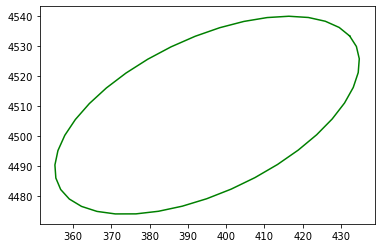

In [38]:
cell_2279 = gaussian_ellipsoid([395, 4507], 0.65, 16, 11, 3)
cell_border = list(zip(*cell_2279))
plt.plot(cell_border[0], cell_border[1], c='g')

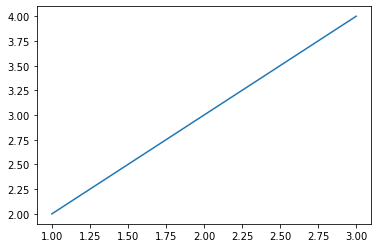

In [33]:
plt.plot([1,2,3], [2,3,4])

In [37]:
cell_border[1]

429.5181000573515

In [59]:
gaussian_ellipsoid([4507.14545, 395.067], 0.65295103, 16.9173925,  11.81628773, 3)

array([[4546.78661314,  423.71357551],
       [4543.85278608,  426.69207891],
       [4539.96825829,  428.85150938],
       [4535.23363701,  430.1359388 ],
       [4529.77154644,  430.51210112],
       [4523.72345186,  429.97025395],
       [4517.24599574,  428.52443083],
       [4510.50694079,  426.21207783],
       [4503.68082499,  423.09308367],
       [4496.94444116,  419.24822866],
       [4490.4722581 ,  414.77709254],
       [4484.43190196,  409.79547537],
       [4478.97981478,  404.43239843],
       [4474.25720275,  398.82676258],
       [4470.38637905,  393.12375086],
       [4467.46759599,  387.47106828],
       [4465.57644849,  382.01511633],
       [4464.76191631,  376.89720131],
       [4465.04509538,  372.24987454],
       [4466.41865152,  368.19349933],
       [4468.84701035,  364.83313367],
       [4472.26727865,  362.25580927],
       [4476.59087327,  360.52827748],
       [4481.70581538,  359.69528045],
       [4487.47963066,  359.77839238],
       [4493.76278033,  3